## Identificação:

**Nome:** Gabriel Francisco de Oliveira Castro

**Matrícula:** 202066571

## 1. Preparação do ambiente

  A partir desse ponto iremos preparar o ambiente para criação da nossa rede. Diferente, do que foi usado durante o semestre iremos tentar implementar a rede usando as biliotecas do Keras, com adicional do Early Stop, e Tensor Flow.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Definições gerais
np.random.seed(42)

# Função para normalizar dados
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

## 2. Arquitetura da Rede Neural


Criaremos em compilaremos um modelo de Autoencoder utilizando o Keras. Ela define a arquitetura da rede neural com uma camada de entrada, um codificador com duas camadas densas (usando ReLU e dropout), e um decodificador simétrico que reconstrói a entrada original. O modelo é compilado com o otimizador Adam e a função de perda de erro quadrático médio. A função retorna o modelo pronto para treinamento.

In [2]:
def build_autoencoder(input_dim, encoding_dim):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim * 2, activation='relu')(input_layer)
    encoder = Dropout(0.2)(encoder)
    encoder = Dense(encoding_dim, activation='relu')(encoder)
    decoder = Dense(encoding_dim * 2, activation='relu')(encoder)
    decoder = Dropout(0.2)(decoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)
    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return autoencoder

## 3. Função  de Treinamento

Treinaremos nosso modelo, utilizaremos o early stopping, que interrompe o treinamento se a perda de validação não melhorar por 5 épocas, restaurando os melhores pesos. O treinamento usa 10% dos dados para validação, com o número de épocas e o tamanho do lote especificados. A função retorna o histórico de treinamento.

In [3]:
def train_autoencoder(autoencoder, data, epochs, batch_size):
    early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = autoencoder.fit(data, data, epochs=epochs, batch_size=batch_size, shuffle=True, validation_split=0.1, callbacks=[early_stop])
    return history

Abaixo plotaremos o histórico de treinamento do nosso Autoencoder, exibindo as curvas de perda de treinamento e validação ao longo das épocas.

In [4]:
def plot_training_history(history):
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Histórico de Treinamento')
    plt.xlabel('Epocas')
    plt.ylabel('F.de Perda')
    plt.legend()
    plt.show()

## 4. Função de Teste

A função aaixo testará nossa Rede calculando a taxa de erro de bits (BER) e o número de erros em diferentes relações sinal-ruído (SNR). Ela adiciona ruído aos dados, decodifica-os e compara os rótulos previstos com os rótulos verdadeiros, plotando o número de erros versus SNR.

In [5]:
# Função de teste (BER)
def test_autoencoder_with_ber(autoencoder, data, labels, EbNodB_range, R):
    ber = []
    num_errors = []
    for EbNodB in EbNodB_range:
        EbNo = 10.0**(EbNodB/10.0)
        noise_std = np.sqrt(1 / (2 * R * EbNo))
        noise = np.random.normal(0, noise_std, data.shape)
        noisy_data = data + noise
        decoded_data = autoencoder.predict(noisy_data)
        pred_labels = np.argmax(decoded_data, axis=1)
        true_labels = np.argmax(labels, axis=1)
        errors = np.sum(pred_labels != true_labels)
        ber.append(errors / data.shape[0])
        num_errors.append(errors)
        print(f'SNR: {EbNodB:.1f} BER: {errors/data.shape[0]:.5f} No. Errors: {errors}')

    plt.figure(figsize=(10, 5))
    plt.plot(EbNodB_range, num_errors, marker='o', label='Number of Errors')
    plt.xlabel('SNR (dB)')
    plt.ylabel('Number of Errors')
    plt.title('Number of Errors vs SNR')
    plt.legend()
    plt.grid()
    plt.show()

    return ber, num_errors

In [6]:
# Função para visualizar resultados do encoder
def plot_encoded_data(autoencoder, data):
    encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
    encoded_data = encoder.predict(data)
    plt.figure(figsize=(10, 5))
    plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=np.argmax(data, axis=1))
    plt.title('Encoded Data')
    plt.xlabel('Encoded Dimension 1')
    plt.ylabel('Encoded Dimension 2')
    plt.colorbar()
    plt.show()

## Definição dos parametros

Abaixo iremos definir alguns parametros das nossa Rede

In [7]:
# Função para definir parâmetros de treino
def set_training_parameters():
    epochs = 500
    batch_size = 64
    return epochs, batch_size


## Exercício A

Epoch 1/500
141/141 [==============================] - 5s 11ms/step - loss: 0.2512 - val_loss: 0.2501
Epoch 2/500
141/141 [==============================] - 1s 9ms/step - loss: 0.2500 - val_loss: 0.2502
Epoch 3/500
141/141 [==============================] - 1s 5ms/step - loss: 0.2500 - val_loss: 0.2502
Epoch 4/500
141/141 [==============================] - 1s 6ms/step - loss: 0.2500 - val_loss: 0.2502
Epoch 5/500
141/141 [==============================] - 1s 6ms/step - loss: 0.2500 - val_loss: 0.2502
Epoch 6/500
141/141 [==============================] - 1s 6ms/step - loss: 0.2500 - val_loss: 0.2503


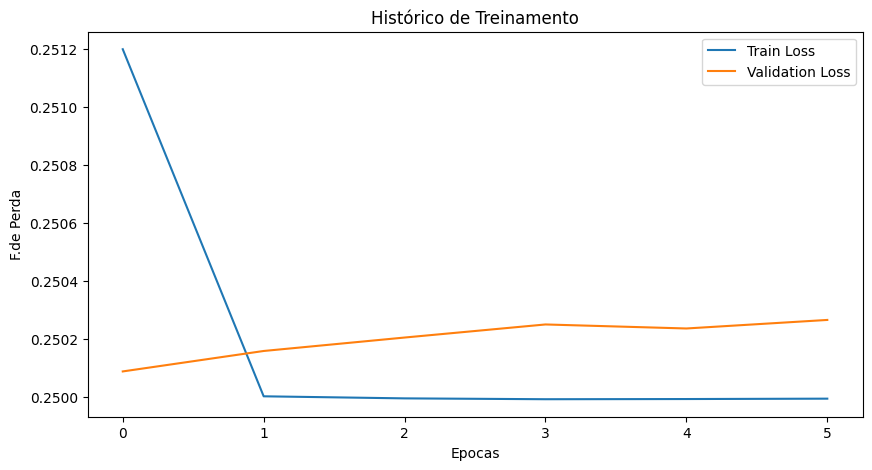

313/313 [==============================] - 1s 2ms/step
SNR: 0.0 BER: 0.42940 No. Errors: 4294
313/313 [==============================] - 1s 2ms/step
SNR: 0.5 BER: 0.42120 No. Errors: 4212
313/313 [==============================] - 1s 2ms/step
SNR: 1.0 BER: 0.40590 No. Errors: 4059
313/313 [==============================] - 1s 2ms/step
SNR: 1.5 BER: 0.39060 No. Errors: 3906
313/313 [==============================] - 1s 3ms/step
SNR: 2.0 BER: 0.38790 No. Errors: 3879
313/313 [==============================] - 1s 2ms/step
SNR: 2.5 BER: 0.37860 No. Errors: 3786
313/313 [==============================] - 1s 2ms/step
SNR: 3.0 BER: 0.36240 No. Errors: 3624
313/313 [==============================] - 1s 2ms/step
SNR: 3.5 BER: 0.35860 No. Errors: 3586
313/313 [==============================] - 1s 2ms/step
SNR: 4.0 BER: 0.34490 No. Errors: 3449
313/313 [==============================] - 1s 2ms/step
SNR: 4.5 BER: 0.34060 No. Errors: 3406
313/313 [==============================] - 1s 3ms/step
SNR: 

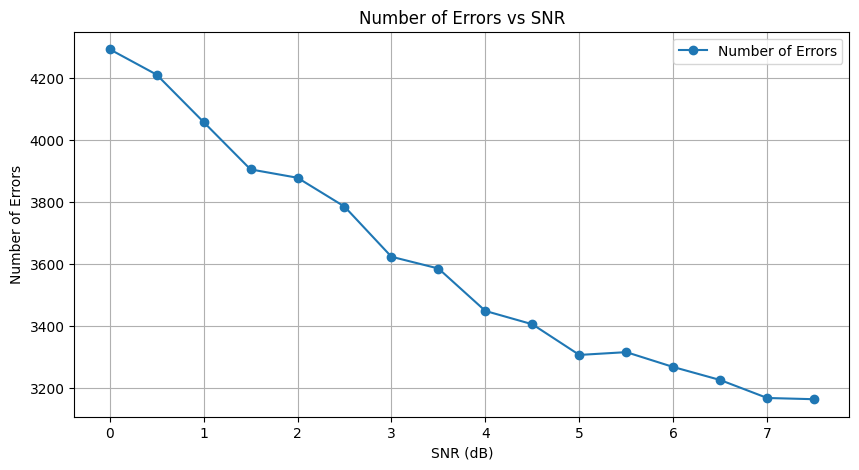

313/313 [==============================] - 1s 2ms/step


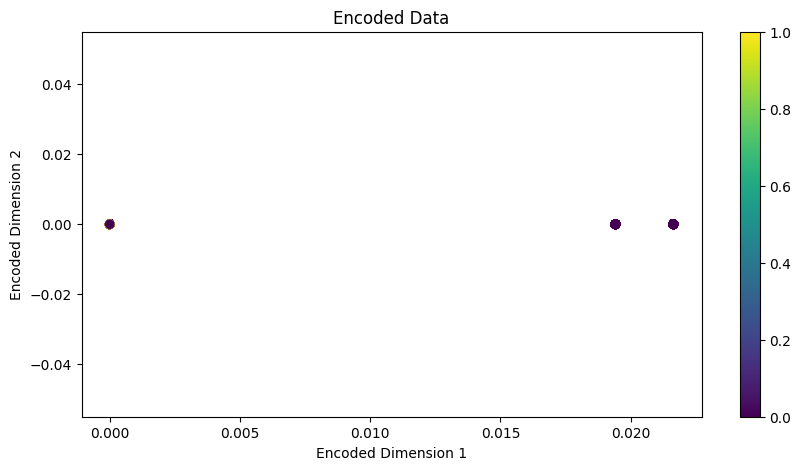

In [8]:
# Exercício A
data_a = np.random.randint(0, 2, size=(10000, 2))  # n = 1, k = 2
labels_a = data_a
data_a = normalize(data_a)
autoencoder_a = build_autoencoder(input_dim=2, encoding_dim=1)
epochs, batch_size = set_training_parameters()
history_a = train_autoencoder(autoencoder_a, data_a, epochs, batch_size)
plot_training_history(history_a)
EbNodB_range = np.linspace(0, 7.5, 16)
R = 1/3
ber_a, num_errors_a = test_autoencoder_with_ber(autoencoder_a, data_a, labels_a, EbNodB_range, R)
plot_encoded_data(autoencoder_a, data_a)

## Exercício B

Epoch 1/500
141/141 [==============================] - 2s 5ms/step - loss: 0.2414 - val_loss: 0.2310
Epoch 2/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2290 - val_loss: 0.2146
Epoch 3/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2186 - val_loss: 0.2014
Epoch 4/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2109 - val_loss: 0.1933
Epoch 5/500
141/141 [==============================] - 0s 3ms/step - loss: 0.2061 - val_loss: 0.1874
Epoch 6/500
141/141 [==============================] - 0s 3ms/step - loss: 0.2030 - val_loss: 0.1820
Epoch 7/500
141/141 [==============================] - 1s 5ms/step - loss: 0.1984 - val_loss: 0.1783
Epoch 8/500
141/141 [==============================] - 1s 5ms/step - loss: 0.1957 - val_loss: 0.1745
Epoch 9/500
141/141 [==============================] - 1s 6ms/step - loss: 0.1948 - val_loss: 0.1706
Epoch 10/500
141/141 [==============================] - 1s 7ms/step - loss: 0.1907 - val_lo

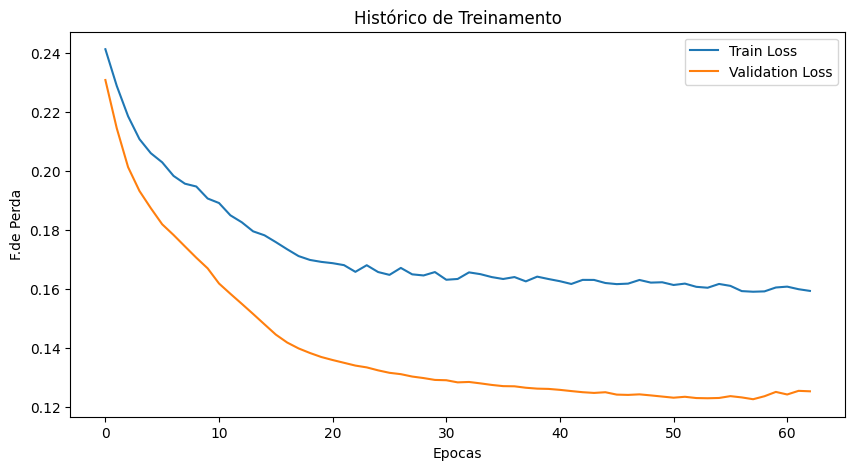

313/313 [==============================] - 1s 3ms/step
SNR: 0.0 BER: 0.60460 No. Errors: 6046
313/313 [==============================] - 1s 2ms/step
SNR: 0.5 BER: 0.60260 No. Errors: 6026
313/313 [==============================] - 1s 2ms/step
SNR: 1.0 BER: 0.59830 No. Errors: 5983
313/313 [==============================] - 1s 2ms/step
SNR: 1.5 BER: 0.61280 No. Errors: 6128
313/313 [==============================] - 1s 2ms/step
SNR: 2.0 BER: 0.61190 No. Errors: 6119
313/313 [==============================] - 1s 2ms/step
SNR: 2.5 BER: 0.61380 No. Errors: 6138
313/313 [==============================] - 1s 3ms/step
SNR: 3.0 BER: 0.61370 No. Errors: 6137
313/313 [==============================] - 1s 3ms/step
SNR: 3.5 BER: 0.60770 No. Errors: 6077
313/313 [==============================] - 1s 2ms/step
SNR: 4.0 BER: 0.61120 No. Errors: 6112
313/313 [==============================] - 1s 2ms/step
SNR: 4.5 BER: 0.61300 No. Errors: 6130
313/313 [==============================] - 2s 5ms/step
SNR: 

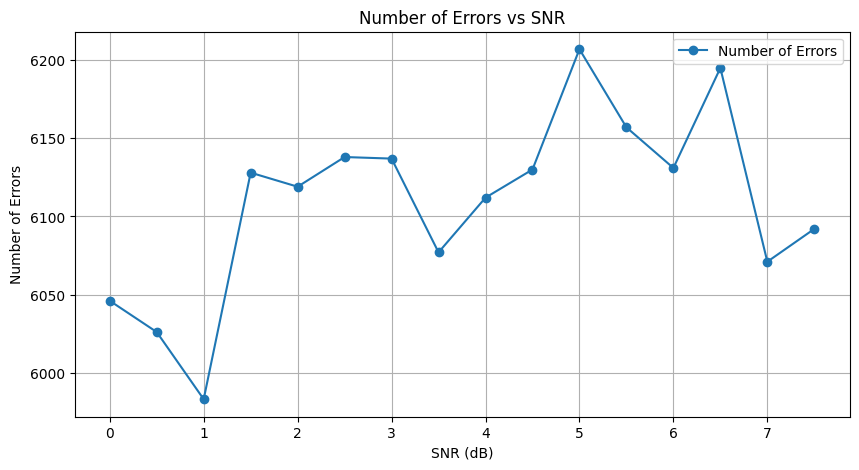

313/313 [==============================] - 1s 2ms/step


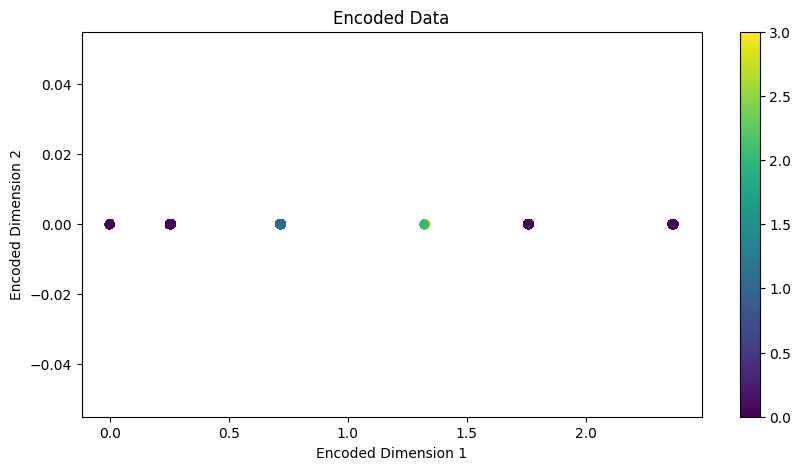

In [9]:
# Exercício B
data_b = np.random.randint(0, 2, size=(10000, 4))  # n = 2, k = 2
labels_b = data_b
data_b = normalize(data_b)

autoencoder_b = build_autoencoder(input_dim=4, encoding_dim=2)
history_b = train_autoencoder(autoencoder_b, data_b, epochs, batch_size)
plot_training_history(history_b)
ber_b, num_errors_b = test_autoencoder_with_ber(autoencoder_b, data_b, labels_b, EbNodB_range, R)
plot_encoded_data(autoencoder_b, data_b)

## Exercício C

Epoch 1/500
141/141 [==============================] - 5s 9ms/step - loss: 0.2458 - val_loss: 0.2390
Epoch 2/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2344 - val_loss: 0.2183
Epoch 3/500
141/141 [==============================] - 1s 5ms/step - loss: 0.2154 - val_loss: 0.1981
Epoch 4/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2065 - val_loss: 0.1892
Epoch 5/500
141/141 [==============================] - 1s 5ms/step - loss: 0.2020 - val_loss: 0.1848
Epoch 6/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2000 - val_loss: 0.1801
Epoch 7/500
141/141 [==============================] - 1s 6ms/step - loss: 0.1963 - val_loss: 0.1744
Epoch 8/500
141/141 [==============================] - 1s 4ms/step - loss: 0.1911 - val_loss: 0.1653
Epoch 9/500
141/141 [==============================] - 1s 6ms/step - loss: 0.1856 - val_loss: 0.1555
Epoch 10/500
141/141 [==============================] - 1s 6ms/step - loss: 0.1800 - val_lo

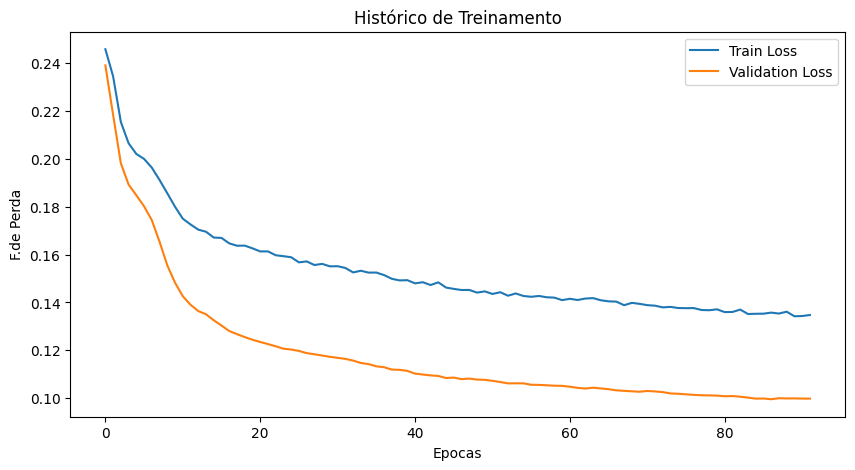

313/313 [==============================] - 1s 2ms/step
SNR: 0.0 BER: 0.82380 No. Errors: 8238
313/313 [==============================] - 0s 1ms/step
SNR: 0.5 BER: 0.81600 No. Errors: 8160
313/313 [==============================] - 1s 3ms/step
SNR: 1.0 BER: 0.80980 No. Errors: 8098
313/313 [==============================] - 1s 2ms/step
SNR: 1.5 BER: 0.80350 No. Errors: 8035
313/313 [==============================] - 1s 2ms/step
SNR: 2.0 BER: 0.79870 No. Errors: 7987
313/313 [==============================] - 1s 2ms/step
SNR: 2.5 BER: 0.79270 No. Errors: 7927
313/313 [==============================] - 1s 3ms/step
SNR: 3.0 BER: 0.79210 No. Errors: 7921
313/313 [==============================] - 1s 3ms/step
SNR: 3.5 BER: 0.78150 No. Errors: 7815
313/313 [==============================] - 1s 2ms/step
SNR: 4.0 BER: 0.77640 No. Errors: 7764
313/313 [==============================] - 1s 2ms/step
SNR: 4.5 BER: 0.77770 No. Errors: 7777
313/313 [==============================] - 1s 2ms/step
SNR: 

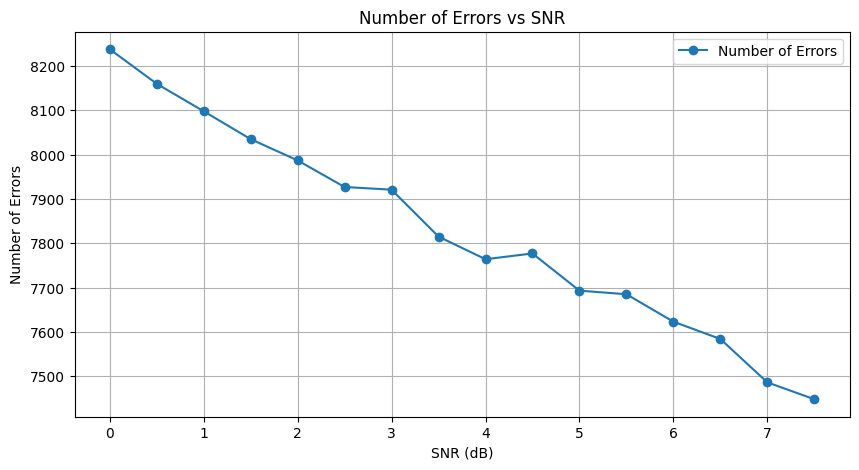

313/313 [==============================] - 0s 1ms/step


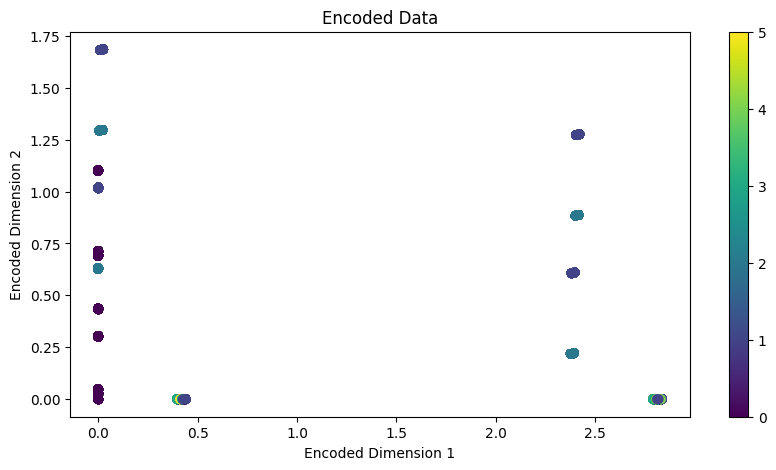

In [10]:
# Exercício C
data_c = np.random.randint(0, 2, size=(10000, 6))  # n = 3, k = 2
labels_c = data_c
data_c = normalize(data_c)

autoencoder_c = build_autoencoder(input_dim=6, encoding_dim=3)
history_c = train_autoencoder(autoencoder_c, data_c, epochs, batch_size)
plot_training_history(history_c)
ber_c, num_errors_c = test_autoencoder_with_ber(autoencoder_c, data_c, labels_c, EbNodB_range, R)
plot_encoded_data(autoencoder_c, data_c)

## Exercício D

Epoch 1/500
141/141 [==============================] - 3s 9ms/step - loss: 0.2487 - val_loss: 0.2433
Epoch 2/500
141/141 [==============================] - 1s 5ms/step - loss: 0.2359 - val_loss: 0.2221
Epoch 3/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2214 - val_loss: 0.2058
Epoch 4/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2124 - val_loss: 0.1939
Epoch 5/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2049 - val_loss: 0.1849
Epoch 6/500
141/141 [==============================] - 0s 3ms/step - loss: 0.2006 - val_loss: 0.1798
Epoch 7/500
141/141 [==============================] - 0s 3ms/step - loss: 0.1971 - val_loss: 0.1772
Epoch 8/500
141/141 [==============================] - 1s 7ms/step - loss: 0.1956 - val_loss: 0.1752
Epoch 9/500
141/141 [==============================] - 1s 4ms/step - loss: 0.1944 - val_loss: 0.1731
Epoch 10/500
141/141 [==============================] - 1s 4ms/step - loss: 0.1929 - val_lo

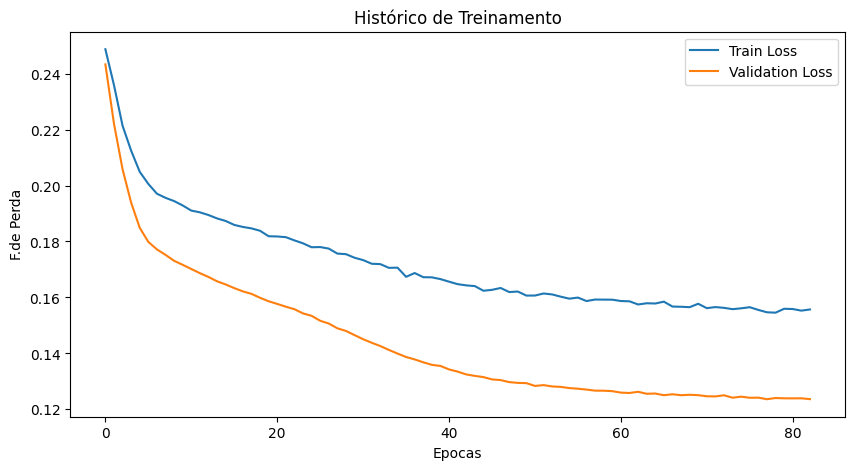

313/313 [==============================] - 1s 2ms/step
SNR: 0.0 BER: 0.63700 No. Errors: 6370
313/313 [==============================] - 1s 2ms/step
SNR: 0.5 BER: 0.63320 No. Errors: 6332
313/313 [==============================] - 1s 2ms/step
SNR: 1.0 BER: 0.63020 No. Errors: 6302
313/313 [==============================] - 1s 2ms/step
SNR: 1.5 BER: 0.63210 No. Errors: 6321
313/313 [==============================] - 0s 1ms/step
SNR: 2.0 BER: 0.63030 No. Errors: 6303
313/313 [==============================] - 1s 2ms/step
SNR: 2.5 BER: 0.63350 No. Errors: 6335
313/313 [==============================] - 1s 3ms/step
SNR: 3.0 BER: 0.63340 No. Errors: 6334
313/313 [==============================] - 1s 3ms/step
SNR: 3.5 BER: 0.63240 No. Errors: 6324
313/313 [==============================] - 1s 2ms/step
SNR: 4.0 BER: 0.63160 No. Errors: 6316
313/313 [==============================] - 1s 2ms/step
SNR: 4.5 BER: 0.63510 No. Errors: 6351
313/313 [==============================] - 1s 2ms/step
SNR: 

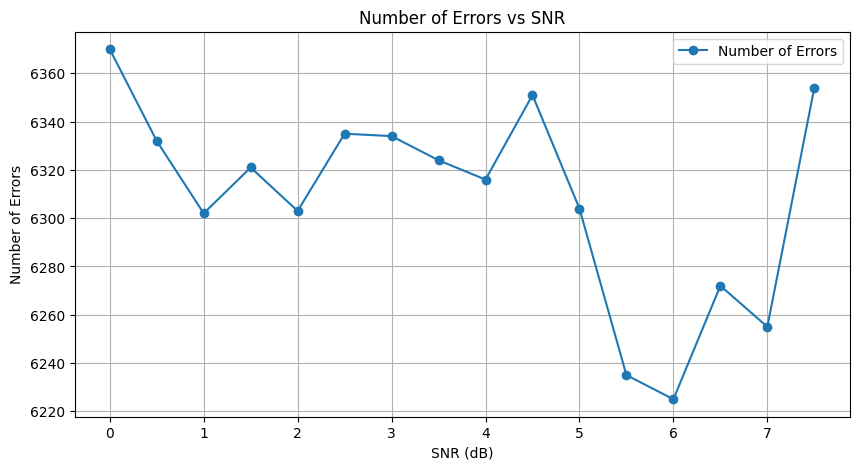

313/313 [==============================] - 1s 2ms/step


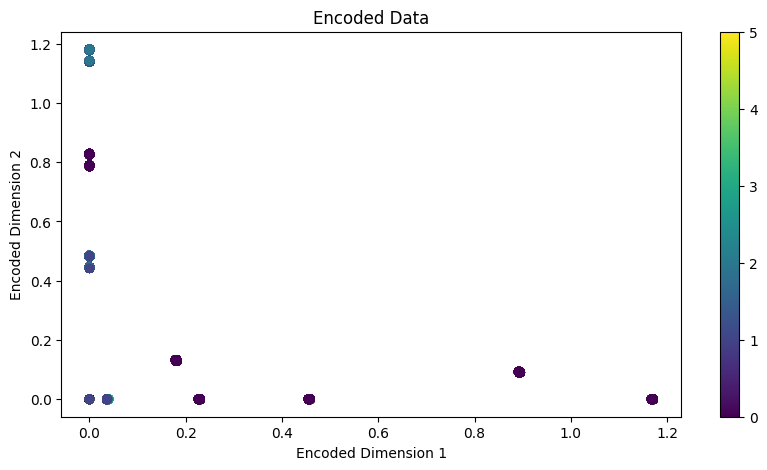

In [11]:
# Exercício D
data_d = np.random.randint(0, 2, size=(10000, 6))  # n = 2, k = 3
labels_d = data_d
data_d = normalize(data_d)

autoencoder_d = build_autoencoder(input_dim=6, encoding_dim=3)
history_d = train_autoencoder(autoencoder_d, data_d, epochs, batch_size)
plot_training_history(history_d)
ber_d, num_errors_d = test_autoencoder_with_ber(autoencoder_d, data_d, labels_d, EbNodB_range, R)
plot_encoded_data(autoencoder_d, data_d)

## Exercício E

Epoch 1/500
141/141 [==============================] - 2s 7ms/step - loss: 0.2423 - val_loss: 0.2328
Epoch 2/500
141/141 [==============================] - 0s 3ms/step - loss: 0.2294 - val_loss: 0.2161
Epoch 3/500
141/141 [==============================] - 0s 3ms/step - loss: 0.2188 - val_loss: 0.2031
Epoch 4/500
141/141 [==============================] - 0s 3ms/step - loss: 0.2117 - val_loss: 0.1951
Epoch 5/500
141/141 [==============================] - 1s 4ms/step - loss: 0.2076 - val_loss: 0.1898
Epoch 6/500
141/141 [==============================] - 0s 3ms/step - loss: 0.2038 - val_loss: 0.1861
Epoch 7/500
141/141 [==============================] - 0s 3ms/step - loss: 0.2018 - val_loss: 0.1833
Epoch 8/500
141/141 [==============================] - 0s 3ms/step - loss: 0.1984 - val_loss: 0.1746
Epoch 9/500
141/141 [==============================] - 0s 3ms/step - loss: 0.1901 - val_loss: 0.1611
Epoch 10/500
141/141 [==============================] - 0s 3ms/step - loss: 0.1836 - val_lo

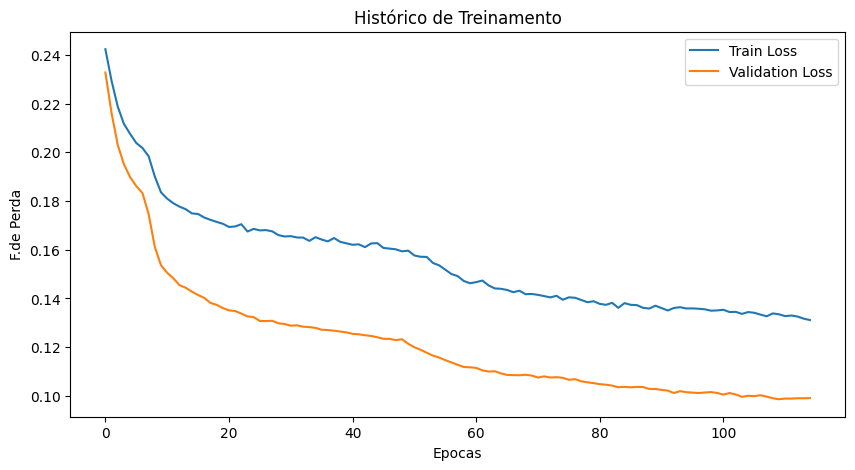

313/313 [==============================] - 1s 2ms/step
SNR: 0.0 BER: 0.56660 No. Errors: 5666
313/313 [==============================] - 1s 2ms/step
SNR: 0.5 BER: 0.56000 No. Errors: 5600
313/313 [==============================] - 1s 2ms/step
SNR: 1.0 BER: 0.55140 No. Errors: 5514
313/313 [==============================] - 1s 2ms/step
SNR: 1.5 BER: 0.55310 No. Errors: 5531
313/313 [==============================] - 1s 2ms/step
SNR: 2.0 BER: 0.54270 No. Errors: 5427
313/313 [==============================] - 1s 2ms/step
SNR: 2.5 BER: 0.55080 No. Errors: 5508
313/313 [==============================] - 1s 2ms/step
SNR: 3.0 BER: 0.53960 No. Errors: 5396
313/313 [==============================] - 1s 2ms/step
SNR: 3.5 BER: 0.52950 No. Errors: 5295
313/313 [==============================] - 1s 2ms/step
SNR: 4.0 BER: 0.52440 No. Errors: 5244
313/313 [==============================] - 1s 3ms/step
SNR: 4.5 BER: 0.52390 No. Errors: 5239
313/313 [==============================] - 1s 4ms/step
SNR: 

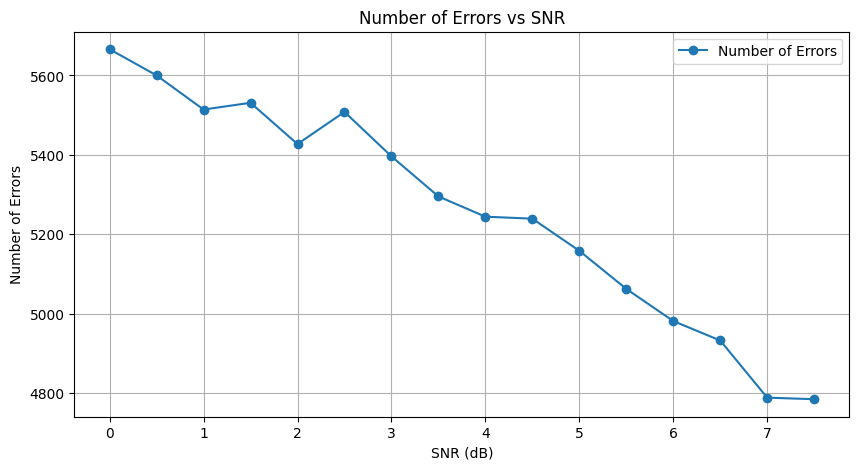

313/313 [==============================] - 1s 2ms/step


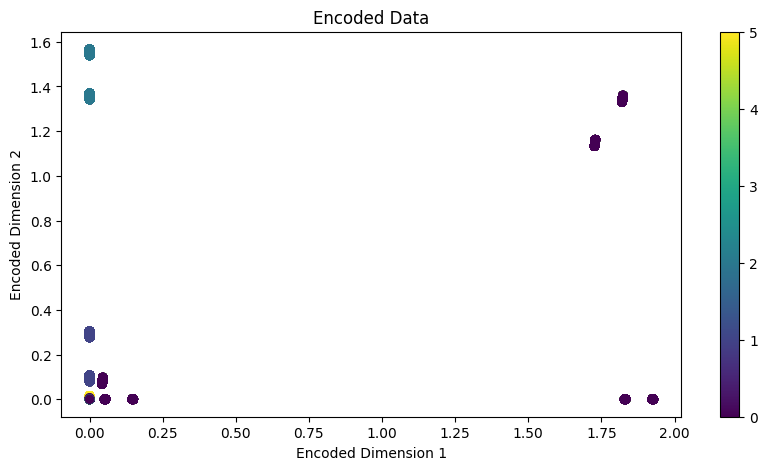

In [12]:
# Exercício E
data_e = np.random.randint(0, 2, size=(10000, 6))  # n = 2, k = 3
labels_e = data_e
data_e = normalize(data_e)

autoencoder_e = build_autoencoder(input_dim=6, encoding_dim=3)
history_e = train_autoencoder(autoencoder_e, data_e, epochs, batch_size)
plot_training_history(history_e)
ber_e, num_errors_e = test_autoencoder_with_ber(autoencoder_e, data_e, labels_e, EbNodB_range, R)
plot_encoded_data(autoencoder_e, data_e)